In [58]:
import obspy 
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import numpy as np
from stdb import load_db 
import obspy 
import pickle
import glob
from sklearn.decomposition import PCA

In [50]:
path = '/Users/tong/qeqeqe/DATA_SKS/GO.ONI/20150211_185720'+'/'
if len(glob.glob(path+'/*')) > 10 :
    calc_type = 'manual'
    Meta_pkl = path + 'Meta_data.pkl'
    Station_data_pkl = path + 'Station_data.pkl'
    ZNE_pkl = path + 'ZNE_data.pkl'
    LQT_pkl = path + 'LQT_data.pkl'
    Split_result_pkl = path + 'Split_results_manual.pkl'
    SC_result_pkl = path + 'SC_res_manual.pkl'
    RC_result_pkl = path + 'RC_res_manual.pkl'
    pick_pkl = path + 'Pickphase.pkl'
else :
    calc_type = 'auto'
    Meta_pkl = path + 'Meta_data.pkl'
    Station_data_pkl = path + 'Station_data.pkl'
    ZNE_pkl = path + 'ZNE_data.pkl'
    LQT_pkl = path + 'LQT_data.pkl'
    Split_result_pkl = path + 'Split_results_auto.pkl'
    SC_result_pkl = path + 'SC_res.pkl'
    RC_result_pkl = path + 'RC_res.pkl'    

Meta = pickle.load(open(Meta_pkl, "rb"))
Station_data = pickle.load(open(Station_data_pkl, "rb"))
ZNE = pickle.load(open(ZNE_pkl, "rb"))
LQT = pickle.load(open(LQT_pkl, "rb"))
Split_result = pickle.load(open(Split_result_pkl, "rb"))
SC_res = pickle.load(open(SC_result_pkl, "rb"))
RC_res = pickle.load(open(RC_result_pkl, "rb"))
if calc_type == 'manual':
    Pick = pickle.load(open(pick_pkl, "rb"))

In [51]:
trL_ori = LQT.select(component='L')[0].copy()
trQ_ori = LQT.select(component='Q')[0].copy()
trT_ori = LQT.select(component='T')[0].copy()
# filter just for plot partical motion
ZNE.filter('bandpass',freqmin=Meta.fmin,freqmax=Meta.fmax,corners=4, zerophase=True)
trZ = ZNE.select(component='Z')[0].copy()
trN = ZNE.select(component='N')[0].copy()
trE = ZNE.select(component='E')[0].copy()

In [52]:
wind_start = 5 
wind_end   = 25  
t1 = Meta.time + Meta.ttime - wind_start
t2 = Meta.time + Meta.ttime + wind_end

trL = trL_ori.copy()
trQ = trQ_ori.copy()
trT = trT_ori.copy()
trL.trim(t1,t2)
trQ.trim(t1,t2)
trT.trim(t1,t2)
trZ.trim(t1,t2)
trN.trim(t1,t2)
trE.trim(t1,t2)

GO.ONI..HHE | 2015-02-11T19:22:17.726260Z - 2015-02-11T19:22:47.726260Z | 10.0 Hz, 301 samples

Text(0.5, 1.0, 'QT, CpH=0.61')

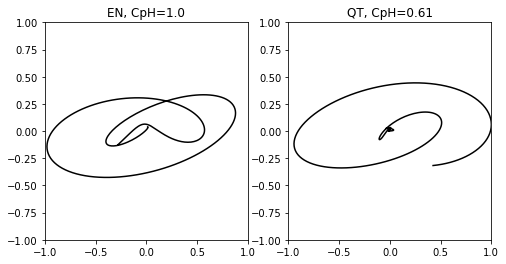

In [53]:
mmax = np.amax([np.abs(trQ.data).max(),np.abs(trT.data).max()])
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.xlim(-1,1);plt.ylim(-1,1)
plt.plot(trE.data/mmax, trN.data/mmax, 'k')
plt.subplot(122)
plt.xlim(-1,1);plt.ylim(-1,1)
plt.plot(trQ.data/mmax, trT.data/mmax, 'k')

from sklearn.decomposition import PCA
X = np.array([trE.data/mmax,trN.data])
X = X.T
pca=PCA(n_components=2)
pca = pca.fit(X)
eigval= pca.singular_values_
CpH = 1-eigval[1]/eigval[0]
plt.subplot(121)
plt.title(f'EN, CpH={round(CpH,2)}')

X = np.array([trT.data,trQ.data])
X = X.T
pca=PCA(n_components=2)
pca = pca.fit(X)
eigval= pca.singular_values_
CpH = 1-eigval[1]/eigval[0]
plt.subplot(122)
plt.title(f'QT, CpH={round(CpH,2)}')